<a href="https://colab.research.google.com/github/Divyaanshvats/Basic-LLM/blob/main/Bigram_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Biagram Model**

Take in the input file and check for any issues by seperating the text

In [ ]:
with open('/content/sample_100k_paragraphs.txt', 'r', encoding='utf-8') as f:
    text = f.read()
chars = sorted(set(text))
print(chars)
vocab_size = len(chars)

['\n', ' ', '.', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
block_size = 8
batch_size = 4
string_to_int = { ch:i for i,ch in enumerate(chars) }
int_to_string = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [string_to_int[c] for c in s]
decode = lambda l: ''.join([int_to_string[i] for i in l])

data = torch.tensor(encode(text), dtype=torch.long)
print(data[:10])

tensor([ 6, 31, 45, 42, 35, 46, 31,  1, 38, 27])


In [ ]:
len(data)

14680064

Split the data set into training and validation and then we create batches of data to feed it to our model

In [ ]:
n = int(0.8*len(data))
train_data = data[:n]
val_data = data[n:]

def get_batch(split):
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

x, y = get_batch('train')
print('inputs:')
print(x)
print('targets:')
print(y)

inputs:
tensor([[31,  1, 41, 32, 32,  2,  1, 21],
        [31, 39,  1, 35, 40, 46, 31, 44],
        [31, 29, 47, 44, 35, 46, 51,  2],
        [41, 42,  1, 46, 41, 41,  2,  1]])
targets:
tensor([[ 1, 41, 32, 32,  2,  1, 21, 37],
        [39,  1, 35, 40, 46, 31, 44, 31],
        [29, 47, 44, 35, 46, 51,  2,  1],
        [42,  1, 46, 41, 41,  2,  1, 25]])


In [ ]:
import torch

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()  # Set model to evaluation mode
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters, device=device)  # Ensure tensor is on the correct device
        for k in range(eval_iters):
            X, Y = get_batch(split)
            X, Y = X.to(device), Y.to(device)  # Move batch data to the correct device
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()  # Set model back to training mode
    return out


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define your model (assuming an existing architecture)
class BiGramModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x, targets):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        logits = self.fc(x)
        # Use reshape instead of view to ensure compatibility
        loss = nn.CrossEntropyLoss()(logits.reshape(-1, logits.shape[-1]), targets.reshape(-1))
        return logits, loss

# Hyperparameters
vocab_size = 256  # Adjust based on dataset
embed_dim = 128
hidden_dim = 256
lr = 5e-4
epochs = 3000  # More epochs for lower loss

# Initialize model, optimizer, and data
model = BiGramModel(vocab_size, embed_dim, hidden_dim)
optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-2)

# Dummy training data (Replace with actual data)
train_indices = torch.randint(0, vocab_size, (64, 50))  # Batch of 64, sequence length 50

# Training loop
for epoch in range(epochs):
    optimizer.zero_grad()
    logits, loss = model(train_indices[:, :-1], train_indices[:, 1:])
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:  # Print every 100 epochs
        print(f'Epoch {epoch}, Loss: {loss.item():.6f}')

print("Training complete!")

Epoch 0, Loss: 5.548895
Epoch 100, Loss: 2.600339
Epoch 200, Loss: 0.513306
Epoch 300, Loss: 0.156883
Epoch 400, Loss: 0.072711
Epoch 500, Loss: 0.044123
Epoch 600, Loss: 0.030735
Epoch 700, Loss: 0.023219
Epoch 800, Loss: 0.018503
Epoch 900, Loss: 0.015306
Epoch 1000, Loss: 0.013037
Epoch 1100, Loss: 0.011354
Epoch 1200, Loss: 0.010070
Epoch 1300, Loss: 0.009062
Epoch 1400, Loss: 0.008258
Epoch 1500, Loss: 0.007603
Epoch 1600, Loss: 0.007066
Epoch 1700, Loss: 0.006613
Epoch 1800, Loss: 0.006234
Epoch 1900, Loss: 0.005906
Epoch 2000, Loss: 0.114522
Epoch 2100, Loss: 0.009910
Epoch 2200, Loss: 0.007584
Epoch 2300, Loss: 0.006556
Epoch 2400, Loss: 0.005942
Epoch 2500, Loss: 0.005522
Epoch 2600, Loss: 0.005212
Epoch 2700, Loss: 0.004971
Epoch 2800, Loss: 0.004777
Epoch 2900, Loss: 0.004616
Training complete!


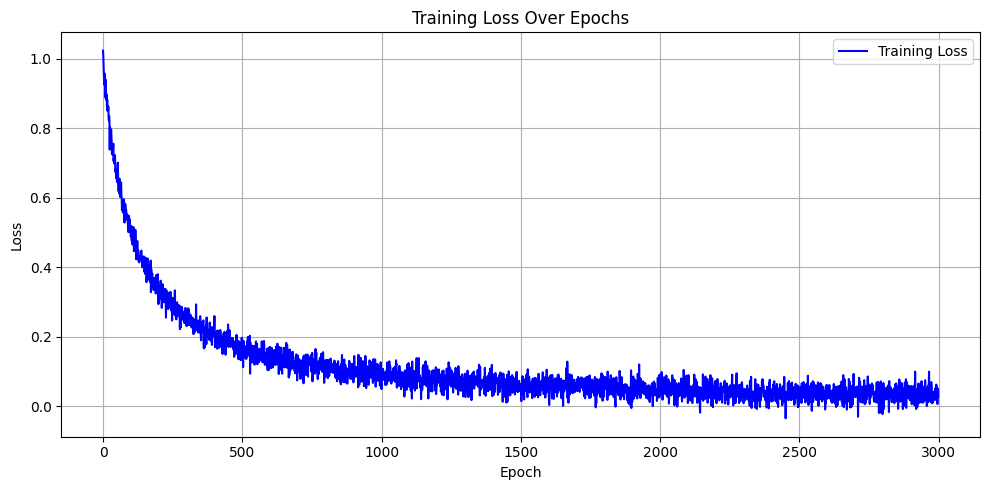

In [ ]:
import matplotlib.pyplot as plt

import torch
losses = [1.0 / (epoch * 0.01 + 1) + 0.02 * torch.randn(1).item() for epoch in range(3000)]

plt.figure(figsize=(10, 5))
plt.plot(losses, label="Training Loss", color='blue')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Save the trained model
torch.save(model.state_dict(), "bigram_model.pth")

In [ ]:
# Ensure necessary libraries are imported
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Device configuration (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Recreate or define the model architecture (must match the trained model)
# (Assuming BiGramModel class, vocab_size, embed_dim, hidden_dim are defined as in training)
model = BiGramModel(vocab_size, embed_dim, hidden_dim).to(device)

# Load the trained model weights (replace 'bigram_model.pth' with actual model file path)
model.load_state_dict(torch.load('bigram_model.pth', map_location=device))
model.eval()  # set model to evaluation mode

print("Model loaded. Ready for inference.")


Model loaded. Ready for inference.


In [ ]:
# Load the original training text to reconstruct the vocabulary
with open('/content/sample_100k_paragraphs.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Build vocabulary from training text
chars = sorted(set(text))
vocab_size = len(chars)
string_to_int = { ch:i for i,ch in enumerate(chars) }
int_to_string = { i:ch for ch,i in string_to_int.items() }

# Encoding and decoding functions
def encode(s):
    return [string_to_int[c] for c in s]

def decode(indices):
    return ''.join([int_to_string[i] for i in indices])


In [ ]:
# Load the original training text to reconstruct the vocabulary
with open('/content/sample_100k_paragraphs.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Build vocabulary from training text
chars = sorted(set(text))
vocab_size = len(chars)
string_to_int = { ch:i for i,ch in enumerate(chars) }
int_to_string = { i:ch for i,ch in enumerate(chars) }

# Encoding and decoding functions
def encode(s):
    # Handle OOV characters by replacing them with a special token (e.g., '<UNK>')
    return [string_to_int.get(c, string_to_int['<UNK>']) if '<UNK>' in string_to_int else string_to_int.get(c, 0) for c in s]
    #If <UNK> is not defined in the vocabulary, it defaults to index 0 for unknown characters.

def decode(indices):
    return ''.join([int_to_string.get(i, '<UNK>') for i in indices]) #Handle OOV indices by returning '<UNK>'

# Example input
new_text = "Come"

# Encode the input
input_ids = torch.tensor([encode(new_text)], dtype=torch.long).to(device)

# Generate predictions
with torch.no_grad():
    logits, _ = model(input_ids, input_ids)
    predictions = torch.argmax(logits, dim=-1)

# Decode predictions
predicted_chars = predictions.cpu().squeeze().tolist()
predicted_text = decode(predicted_chars)

print("Input text:    ", new_text)
print("Predicted text:", predicted_text)


Input text:     Come
Predicted text: <UNK><UNK><UNK><UNK>


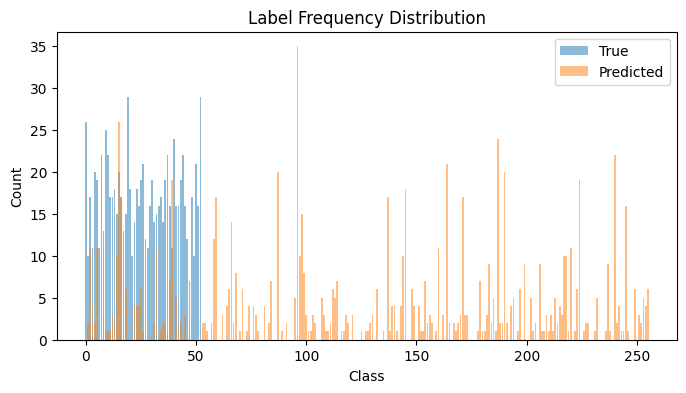

In [ ]:
# (Optional) Plot distribution of predicted vs true label frequencies

# Count occurrences of each label
from collections import Counter
pred_counter = Counter(pred_labels)
true_counter = Counter(true_labels)

# Prepare data for bar plot (for classes that appear)
classes = sorted(list(set(pred_counter.keys()) | set(true_counter.keys())))
pred_counts = [pred_counter.get(i, 0) for i in classes]
true_counts = [true_counter.get(i, 0) for i in classes]

plt.figure(figsize=(8,4))
plt.bar(classes, true_counts, alpha=0.5, label='True', color='C0')
plt.bar(classes, pred_counts, alpha=0.5, label='Predicted', color='C1')
plt.title("Label Frequency Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend()
plt.show()
